 ## Análisis Exploratorio de Datos (EDA) sobre los activos de información del ICBF

Este estudio realiza un Análisis Exploratorio de Datos (EDA) en los activos de información del Instituto Colombiano de Bienestar Familiar (ICBF) para identificar conjuntos de datos susceptibles de ser convertidos en datos públicos disponibles en la plataforma Datos Abiertos. El objetivo es examinar la estructura, características y patrones de los datos del ICBF para seleccionar aquellos adecuados para su publicación. Esta iniciativa promueve la transparencia, participación ciudadana y acceso a la información, fortaleciendo el conocimiento y desarrollo de soluciones innovadoras en beneficio de la sociedad y la mejora de los servicios del ICBF.

### Importamos las librerías necesarias para el análisis

In [1]:
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Base de datos

La base de datos "Registros de Activos de Información" del ICBF es una colección de conjuntos de datos y documentos generados por el Instituto Colombiano de Bienestar Familiar. Estos registros abarcan programas, servicios, datos demográficos, informes y políticas relevantes. Es posible acceder a esta base de datos en el siguiente enlace: https://www.icbf.gov.co/711-registros-de-activos-de-informacion.

### Cargamos la base de datos

In [2]:
datos = pd.read_excel('/content/2._registro_de_activos_de_informacion_2022_v2.xlsm')

In [3]:
datos.head()

,Nombre o título de categoría de Información \n(Término con que se da a conocer el nombre o asunto de la información),Descripción\n (Define brevemente de qué se trata la información),Clasificación,"Idioma \n(Idioma, lengua o dialecto en que se encuentra el activo)",Medio de Conservación y/o soporte \n(Electrónico\nFisico/Electrónico),"Formato \n(la forma, tamaño o modo en la que se presenta la información: hoja de cálculo, imagen, audio, video, documento de texto",Información publicada o disponible \n(señalar dónde está publicada y/o dónde se puede consultar o solicitar),Proceso
0,Actas Dirección de Abastecimiento,Corresponde a la documentación relacionada con...,Pública,ESPAÑOL,FÍSICO-ELECTRÓNICO,DOCUMENTO DE TEXTO,Dirección de Abastecimiento,ADQUISICIÓN_DE_BIENES_Y_SERVICIOS
1,Anexo Alimentos,Documento donde se detallan las característica...,Pública,ESPAÑOL,ELECTRÓNICO,DOCUMENTO DE TEXTO,Dirección de Abastecimiento,ADQUISICIÓN_DE_BIENES_Y_SERVICIOS
2,Conceptos Dirección de Abastecimiento,Documento técnico emitido para dar el concepto...,Pública,ESPAÑOL,FÍSICO-ELECTRÓNICO,DOCUMENTO DE TEXTO,Dirección de Abastecimiento,ADQUISICIÓN_DE_BIENES_Y_SERVICIOS
3,Contratos Estatales Dirección de Abastecimiento,Corresponde a los expedientes del contrato cel...,Clasificada,ESPAÑOL,FÍSICO-ELECTRÓNICO,DOCUMENTO DE TEXTO,Dirección de Abastecimiento,ADQUISICIÓN_DE_BIENES_Y_SERVICIOS
4,Estudio de Sector para Mínima Cuantía o Cont...,Documento que contiene la información del estu...,Pública,ESPAÑOL,ELECTRÓNICO,DOCUMENTO DE TEXTO,Dirección de Abastecimiento,ADQUISICIÓN_DE_BIENES_Y_SERVICIOS


### Limpieza de datos

Con el objetivo de identificar conjuntos de datos que puedan convertirse en datos abiertos, nos centraremos en las columnas 'Clasificación' y 'Medio de Conservación y/o Soporte (Electrónico/Físico-Electrónico)'. Para facilitar la manipulación de los datos, se modificará el nombre de esta última columna.

Con el fin de evitar problemas relacionados con las etiquetas de los datos, se aplicarán los métodos strip() y title() para eliminar espacios innecesarios y estandarizar las mayúsculas en las cadenas de texto.



In [4]:
datos.rename(
    columns={'Medio de Conservación y/o soporte \n(Electrónico\nFisico/Electrónico)': 'Medio de Conservación'},
    inplace=True)

datos[['Clasificación', 'Medio de Conservación']] = datos[['Clasificación', 'Medio de Conservación']].apply(lambda x: x.str.strip().str.title())


### Análisis

Según el Registro de Activos de Información del ICBF, se han identificado un total de 900 activos. De estos, el **73.11% (658)** corresponden a la categoría de **información pública**.

In [5]:
df = datos.copy()
categoria_counts = df['Clasificación'].value_counts()

len(df), categoria_counts

(900,
 Pública        658
 Clasificada    185
 Reservada       57
 Name: Clasificación, dtype: int64)

In [6]:
categoria_counts = categoria_counts.to_frame()
categoria_counts['%'] = (categoria_counts / categoria_counts.sum()) * 100
categoria_counts['%'] = categoria_counts['%'].apply(lambda x: "{:.2f}%".format(x))
categoria_counts

,Clasificación,%
Pública,658,73.11%
Clasificada,185,20.56%
Reservada,57,6.33%


### Conjutos de datos con carácter público

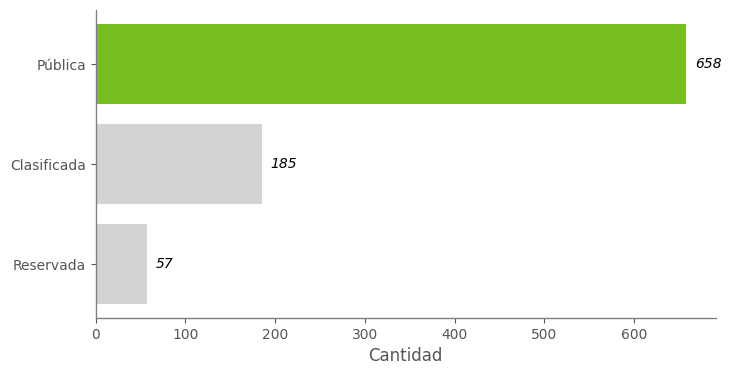

In [7]:
# Establecer el estilo 'ggplot'
plt.style.use('ggplot')

# Definir el orden de las barras
categoria_counts = categoria_counts.sort_values(by='Clasificación', ascending=True)

# Configurar el color de fondo del gráfico en blanco
plt.rcParams['axes.facecolor'] = 'white'

# Ajustar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Asignar colores a las barras
colors = ['#78be21' if categoria == 'Pública' else 'lightgray' for categoria in categoria_counts.index]

# Crear gráfica de barras horizontales
ax.barh(categoria_counts.index, categoria_counts['Clasificación'].values, color=colors)

# Mostrar los ejes X e Y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Cambiar el color de los ejes X e Y a gris
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Colocar etiquetas numéricas fuera de las barras
for y, x in enumerate(categoria_counts['Clasificación'].values):
    ax.annotate(str("{:,}".format(x)),
                xy=(x, y),
                xytext=(x + 10, y),
                va='center',
                ha="left",
                fontstyle="italic",
                color="black",
                size=10)

# Etiqueta eje X
ax.set_xlabel('Cantidad')

plt.savefig('Categoria_Activos.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


### Medios de conservación

In [8]:
medio_conservacion = df.groupby('Clasificación')['Medio de Conservación'].value_counts().to_frame()
medio_conservacion['%'] = (medio_conservacion / medio_conservacion.sum()) * 100
medio_conservacion['%'] = medio_conservacion['%'].apply(lambda x: "{:.2f}%".format(x))
medio_conservacion

Medio de Conservación       %
Clasificación Medio de Conservación                               
Clasificada   Físico-Electrónico                       107  11.89%
              Electrónico                               60   6.67%
              Físico                                    18   2.00%
Pública       Físico-Electrónico                       335  37.22%
              Electrónico                              278  30.89%
              Físico                                    45   5.00%
Reservada     Físico-Electrónico                        33   3.67%
              Electrónico                               18   2.00%
              Físico                                     6   0.67%

### Medios de conservación de los conjuntos públicos

De los 658 conjuntos de datos públicos, el 93.16% (613) cuenta con un método de conservación electrónico. Esta información clasificada como pública es especialmente susceptible de convertirse en datos abiertos, lo que permite un acceso más amplio y transparente a dicha información.

In [9]:
medio_publica = medio_conservacion.loc['Pública'].copy()
medio_publica['%'] = (medio_publica['Medio de Conservación'] / medio_publica['Medio de Conservación'].sum()) * 100
medio_publica['%'] = medio_publica['%'].apply(lambda x: "{:.2f}%".format(x))
medio_publica


,Medio de Conservación,%
Medio de Conservación,,
Físico-Electrónico,335,50.91%
Electrónico,278,42.25%
Físico,45,6.84%


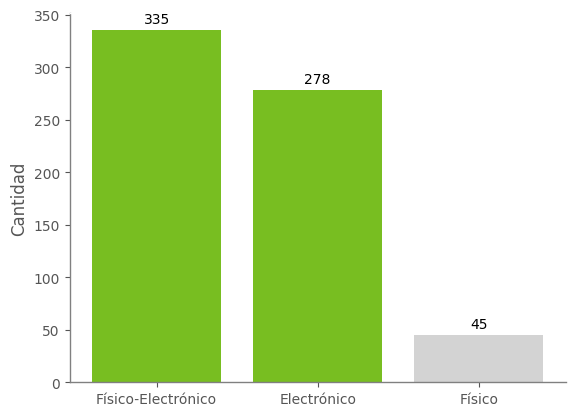

In [10]:
# Selección de datos
categorias = medio_publica.index.get_level_values(0).unique()
valores = medio_publica['Medio de Conservación'].values.flatten()

# Colores de las barras
colores = ['lightgray' if c == 'Físico' else '#78be21' for c in categorias]

# Crear la gráfica de barras apiladas
fig, ax = plt.subplots()

# Definir la posición de las barras
posiciones = np.arange(len(categorias))

# Crear las barras apiladas
barras = ax.bar(posiciones, valores, color=colores)

# Cambiar el color de los ejes X e Y a gris
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Etiquetas de las categorías
ax.set_xticks(posiciones)
ax.set_xticklabels(categorias)

# Etiquetas de los números de las columnas
for i, barra in enumerate(barras):
    ax.annotate(str(valores[i]), xy=(barra.get_x() + barra.get_width() / 2, barra.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Etiquetas de los ejes y título del gráfico
ax.set_ylabel('Cantidad')

plt.savefig('Conservación_Pública.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()
